In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# DATA SET 5

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2005.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2005-11-01 01:00:00,NaN,0.77,NaN,NaN,NaN,57.130001,128.699997,NaN,14.720000,14.91,10.65,NaN,4.62,NaN,NaN,28079001
1,2005-11-01 01:00:00,1.52,0.65,1.49,4.57,0.25,86.559998,181.699997,1.27,11.680000,30.93,NaN,1.59,7.80,1.35,7.98,28079035
2,2005-11-01 01:00:00,NaN,0.40,NaN,NaN,NaN,46.119999,53.000000,NaN,30.469999,14.60,NaN,NaN,5.76,NaN,NaN,28079003
3,2005-11-01 01:00:00,NaN,0.42,NaN,NaN,NaN,37.220001,52.009998,NaN,21.379999,15.16,NaN,NaN,6.60,NaN,NaN,28079004
4,2005-11-01 01:00:00,NaN,0.57,NaN,NaN,NaN,32.160000,36.680000,NaN,33.410000,5.00,NaN,NaN,3.00,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236995,2006-01-01 00:00:00,1.08,0.36,1.01,NaN,0.11,21.990000,23.610001,NaN,43.349998,5.00,NaN,NaN,6.68,1.37,2.75,28079023
236996,2006-01-01 00:00:00,0.39,0.54,1.00,1.00,0.11,2.200000,4.220000,1.00,69.639999,4.95,1.49,1.00,7.06,1.28,0.38,28079024
236997,2006-01-01 00:00:00,0.19,NaN,0.26,NaN,0.08,26.730000,30.809999,NaN,43.840000,4.31,2.93,NaN,13.20,1.28,0.56,28079026
236998,2006-01-01 00:00:00,0.14,NaN,1.00,NaN,0.06,13.770000,17.770000,NaN,NaN,5.00,NaN,NaN,5.81,1.25,0.22,28079027


In [3]:
b=a.fillna(value=10)
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2005-11-01 01:00:00,10.00,0.77,10.00,10.00,10.00,57.130001,128.699997,10.00,14.720000,14.91,10.65,10.00,4.62,10.00,10.00,28079001
1,2005-11-01 01:00:00,1.52,0.65,1.49,4.57,0.25,86.559998,181.699997,1.27,11.680000,30.93,10.00,1.59,7.80,1.35,7.98,28079035
2,2005-11-01 01:00:00,10.00,0.40,10.00,10.00,10.00,46.119999,53.000000,10.00,30.469999,14.60,10.00,10.00,5.76,10.00,10.00,28079003
3,2005-11-01 01:00:00,10.00,0.42,10.00,10.00,10.00,37.220001,52.009998,10.00,21.379999,15.16,10.00,10.00,6.60,10.00,10.00,28079004
4,2005-11-01 01:00:00,10.00,0.57,10.00,10.00,10.00,32.160000,36.680000,10.00,33.410000,5.00,10.00,10.00,3.00,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236995,2006-01-01 00:00:00,1.08,0.36,1.01,10.00,0.11,21.990000,23.610001,10.00,43.349998,5.00,10.00,10.00,6.68,1.37,2.75,28079023
236996,2006-01-01 00:00:00,0.39,0.54,1.00,1.00,0.11,2.200000,4.220000,1.00,69.639999,4.95,1.49,1.00,7.06,1.28,0.38,28079024
236997,2006-01-01 00:00:00,0.19,10.00,0.26,10.00,0.08,26.730000,30.809999,10.00,43.840000,4.31,2.93,10.00,13.20,1.28,0.56,28079026
236998,2006-01-01 00:00:00,0.14,10.00,1.00,10.00,0.06,13.770000,17.770000,10.00,10.000000,5.00,10.00,10.00,5.81,1.25,0.22,28079027


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237000 entries, 0 to 236999
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     237000 non-null  object 
 1   BEN      237000 non-null  float64
 2   CO       237000 non-null  float64
 3   EBE      237000 non-null  float64
 4   MXY      237000 non-null  float64
 5   NMHC     237000 non-null  float64
 6   NO_2     237000 non-null  float64
 7   NOx      237000 non-null  float64
 8   OXY      237000 non-null  float64
 9   O_3      237000 non-null  float64
 10  PM10     237000 non-null  float64
 11  PM25     237000 non-null  float64
 12  PXY      237000 non-null  float64
 13  SO_2     237000 non-null  float64
 14  TCH      237000 non-null  float64
 15  TOL      237000 non-null  float64
 16  station  237000 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 30.7+ MB


In [5]:
b.describe()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
count,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,237000.000000,2.370000e+05
mean,7.415213,1.415242,7.565781,9.294485,6.151434,61.396946,118.463746,8.968339,33.164811,33.737100,12.558604,8.941295,11.798840,6.634251,9.050278,2.807902e+07
std,4.102609,2.608781,4.036698,2.586276,4.796101,37.545562,118.709648,2.752478,26.525868,30.320702,8.868562,2.808930,9.032748,4.187832,4.844743,1.879073e+01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.807900e+07
25%,2.230000,0.350000,2.790000,10.000000,0.180000,33.070000,42.720001,10.000000,10.000000,12.330000,10.000000,10.000000,6.670000,1.430000,10.000000,2.807901e+07
50%,10.000000,0.550000,10.000000,10.000000,10.000000,55.689999,82.570000,10.000000,26.150000,25.000000,10.000000,10.000000,9.150000,10.000000,10.000000,2.807902e+07
75%,10.000000,0.930000,10.000000,10.000000,10.000000,82.510002,151.300003,10.000000,50.639999,45.080002,10.000000,10.000000,13.630000,10.000000,10.000000,2.807903e+07
max,40.090000,10.000000,84.279999,77.379997,10.000000,419.500000,1775.000000,75.250000,166.600006,418.200012,171.000000,76.809998,151.000000,10.000000,149.500000,2.807910e+07


In [6]:
c=b.head(100)
c

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2005-11-01 01:00:00,10.00,0.77,10.00,10.00,10.00,57.130001,128.699997,10.00,14.720000,14.91,10.65,10.00,4.62,10.00,10.00,28079001
1,2005-11-01 01:00:00,1.52,0.65,1.49,4.57,0.25,86.559998,181.699997,1.27,11.680000,30.93,10.00,1.59,7.80,1.35,7.98,28079035
2,2005-11-01 01:00:00,10.00,0.40,10.00,10.00,10.00,46.119999,53.000000,10.00,30.469999,14.60,10.00,10.00,5.76,10.00,10.00,28079003
3,2005-11-01 01:00:00,10.00,0.42,10.00,10.00,10.00,37.220001,52.009998,10.00,21.379999,15.16,10.00,10.00,6.60,10.00,10.00,28079004
4,2005-11-01 01:00:00,10.00,0.57,10.00,10.00,10.00,32.160000,36.680000,10.00,33.410000,5.00,10.00,10.00,3.00,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2005-11-01 04:00:00,10.00,0.46,10.00,10.00,10.00,12.200000,12.890000,10.00,39.349998,10.89,10.00,10.00,4.41,10.00,10.00,28079018
96,2005-11-01 04:00:00,10.00,0.29,10.00,10.00,10.00,56.860001,74.260002,10.00,20.809999,5.33,10.00,10.00,5.50,10.00,10.00,28079019
97,2005-11-01 04:00:00,10.00,0.55,10.00,10.00,10.00,17.459999,25.100000,10.00,31.110001,5.90,10.00,10.00,8.37,10.00,10.00,28079021
98,2005-11-01 04:00:00,10.00,0.28,10.00,10.00,10.00,25.660000,29.799999,10.00,31.379999,3.93,5.50,10.00,5.04,10.00,10.00,28079022


In [7]:
c.columns

Index(['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [8]:
d=c[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,10.00,0.77,10.00,10.00,10.00,57.130001,128.699997,10.00,14.720000,14.91,10.00,4.62,10.00,10.00,28079001
1,1.52,0.65,1.49,4.57,0.25,86.559998,181.699997,1.27,11.680000,30.93,1.59,7.80,1.35,7.98,28079035
2,10.00,0.40,10.00,10.00,10.00,46.119999,53.000000,10.00,30.469999,14.60,10.00,5.76,10.00,10.00,28079003
3,10.00,0.42,10.00,10.00,10.00,37.220001,52.009998,10.00,21.379999,15.16,10.00,6.60,10.00,10.00,28079004
4,10.00,0.57,10.00,10.00,10.00,32.160000,36.680000,10.00,33.410000,5.00,10.00,3.00,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.00,0.46,10.00,10.00,10.00,12.200000,12.890000,10.00,39.349998,10.89,10.00,4.41,10.00,10.00,28079018
96,10.00,0.29,10.00,10.00,10.00,56.860001,74.260002,10.00,20.809999,5.33,10.00,5.50,10.00,10.00,28079019
97,10.00,0.55,10.00,10.00,10.00,17.459999,25.100000,10.00,31.110001,5.90,10.00,8.37,10.00,10.00,28079021
98,10.00,0.28,10.00,10.00,10.00,25.660000,29.799999,10.00,31.379999,3.93,10.00,5.04,10.00,10.00,28079022


# LINEAR REGRESSION

In [9]:
x=d[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL']]
y=d['station']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)


28078930.800741006


In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,9.286304
CO,0.911845
EBE,-7.060348
MXY,26.002100
NMHC,-62.925708
NO_2,0.422729
NOx,-0.322479
OXY,-81.392372
O_3,0.180057
PM10,-0.323554


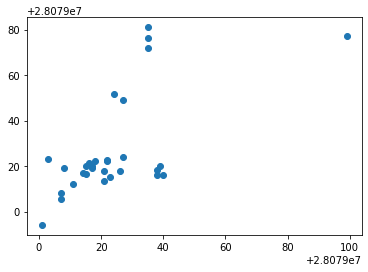

In [14]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [15]:
print(lr.score(x_test,y_test))

-0.027667585420436014


In [16]:
lr.score(x_train,y_train)

0.5155320814217195

# LASSO REGRESSION

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
la.score(x_test,y_test)

0.13080129535098628

# RIDGE REGRESSION

In [20]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [21]:
rr.score(x_test,y_test)

0.34778473117819775

# LOGISTIC REGRESSION

In [22]:
w=d.iloc[:,0:14]
w1=d.iloc[:,-1]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
b=StandardScaler().fit_transform(w)


In [25]:
from sklearn.model_selection import train_test_split
b_train,b_test,w1_train,w1_test=train_test_split(b,w1,test_size=0.7)

In [26]:
p=LogisticRegression(max_iter=10000)
p.fit(b,w1)

LogisticRegression(max_iter=10000)

In [27]:
t=[[12,22,32,42,52,45,32,56,87,34,69,15,23,90]]


In [28]:
e=p.predict(t)
print(e)

[28079003]


In [29]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079008,
       28079009, 28079011, 28079012, 28079014, 28079015, 28079016,
       28079017, 28079018, 28079019, 28079021, 28079022, 28079023,
       28079024, 28079026, 28079027, 28079035, 28079038, 28079039,
       28079040, 28079099], dtype=int64)

In [30]:
print(p.score(x_test,y_test))

0.06666666666666667


In [31]:
p.predict_proba(t)[0][0]

1.8423262375546536e-65

In [32]:
p.predict_proba(t)[0][1]

0.9999999999996112

# ELASTIC NET

In [33]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [34]:
print(p.coef_)

[-0.          0.97943054 -0.06891847 -0.          0.02813556  0.35417925
 -0.299424   -2.24976488 -0.18197309 -0.15371112 -1.6602429  -0.52477951
  0.04905956  0.        ]


In [35]:
print(p.intercept_)

28079066.602501933


In [36]:
print(p.predict(x_test))

[28079014.66501449 28079051.05777047 28079015.206965   28079018.7945692
 28079017.27041718 28079009.63874998 28078999.48960341 28079015.83182127
 28079029.08228589 28079017.60926982 28079019.94423933 28079019.85976914
 28079019.06554686 28079019.31695812 28079039.1758214  28079032.07503427
 28079019.1285935  28079017.40614759 28079014.78251735 28079017.03454683
 28079016.66581078 28079021.48846575 28079007.88474401 28079018.31634694
 28079028.98776937 28079015.78537627 28079045.88629507 28079023.6830644
 28079015.14000977 28079013.3416548 ]


In [37]:
print(p.score(x_test,y_test))

0.3063038654085891


# RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
parameters={'max_depth':[1,53,67,53,57],
  'min_samples_leaf':[5,34,67,87,45],
           'n_estimators':[23,45,67,23,56]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 67, 53, 57],
                         'min_samples_leaf': [5, 34, 67, 87, 45],
                         'n_estimators': [23, 45, 67, 23, 56]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.37142857142857144

In [42]:
rfc_best=grid_search.best_estimator_

[Text(1550.0, 2441.67, 'X[6] <= 79.685\ngini = 0.942\nsamples = 45\nvalue = [2, 2, 7, 6, 4, 3, 5, 2, 6, 4, 2, 4, 0, 2\n6, 1, 1, 1, 0, 2, 1, 2, 2, 1, 3, 1]'),
 Text(930.0, 1997.73, 'X[12] <= 5.795\ngini = 0.925\nsamples = 34\nvalue = [0, 2, 7, 0, 4, 3, 5, 2, 0, 4, 2, 4, 0, 2\n6, 1, 1, 1, 0, 0, 1, 0, 2, 1, 3, 1]'),
 Text(620.0, 1553.79, 'gini = 0.816\nsamples = 9\nvalue = [0, 0, 0, 0, 4, 3, 0, 2, 0, 0, 2, 0, 0, 0\n0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]'),
 Text(1240.0, 1553.79, 'X[8] <= 23.65\ngini = 0.885\nsamples = 25\nvalue = [0, 2, 7, 0, 0, 0, 5, 0, 0, 4, 0, 4, 0, 2\n6, 1, 1, 0, 0, 0, 0, 0, 2, 1, 3, 0]'),
 Text(620.0, 1109.85, 'X[6] <= 48.09\ngini = 0.759\nsamples = 10\nvalue = [0, 0, 7, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0\n3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]'),
 Text(310.0, 665.9099999999999, 'gini = 0.656\nsamples = 5\nvalue = [0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]'),
 Text(930.0, 665.9099999999999, 'gini = 0.64\nsamples = 5\nvalue = [0, 0, 5, 0, 0,

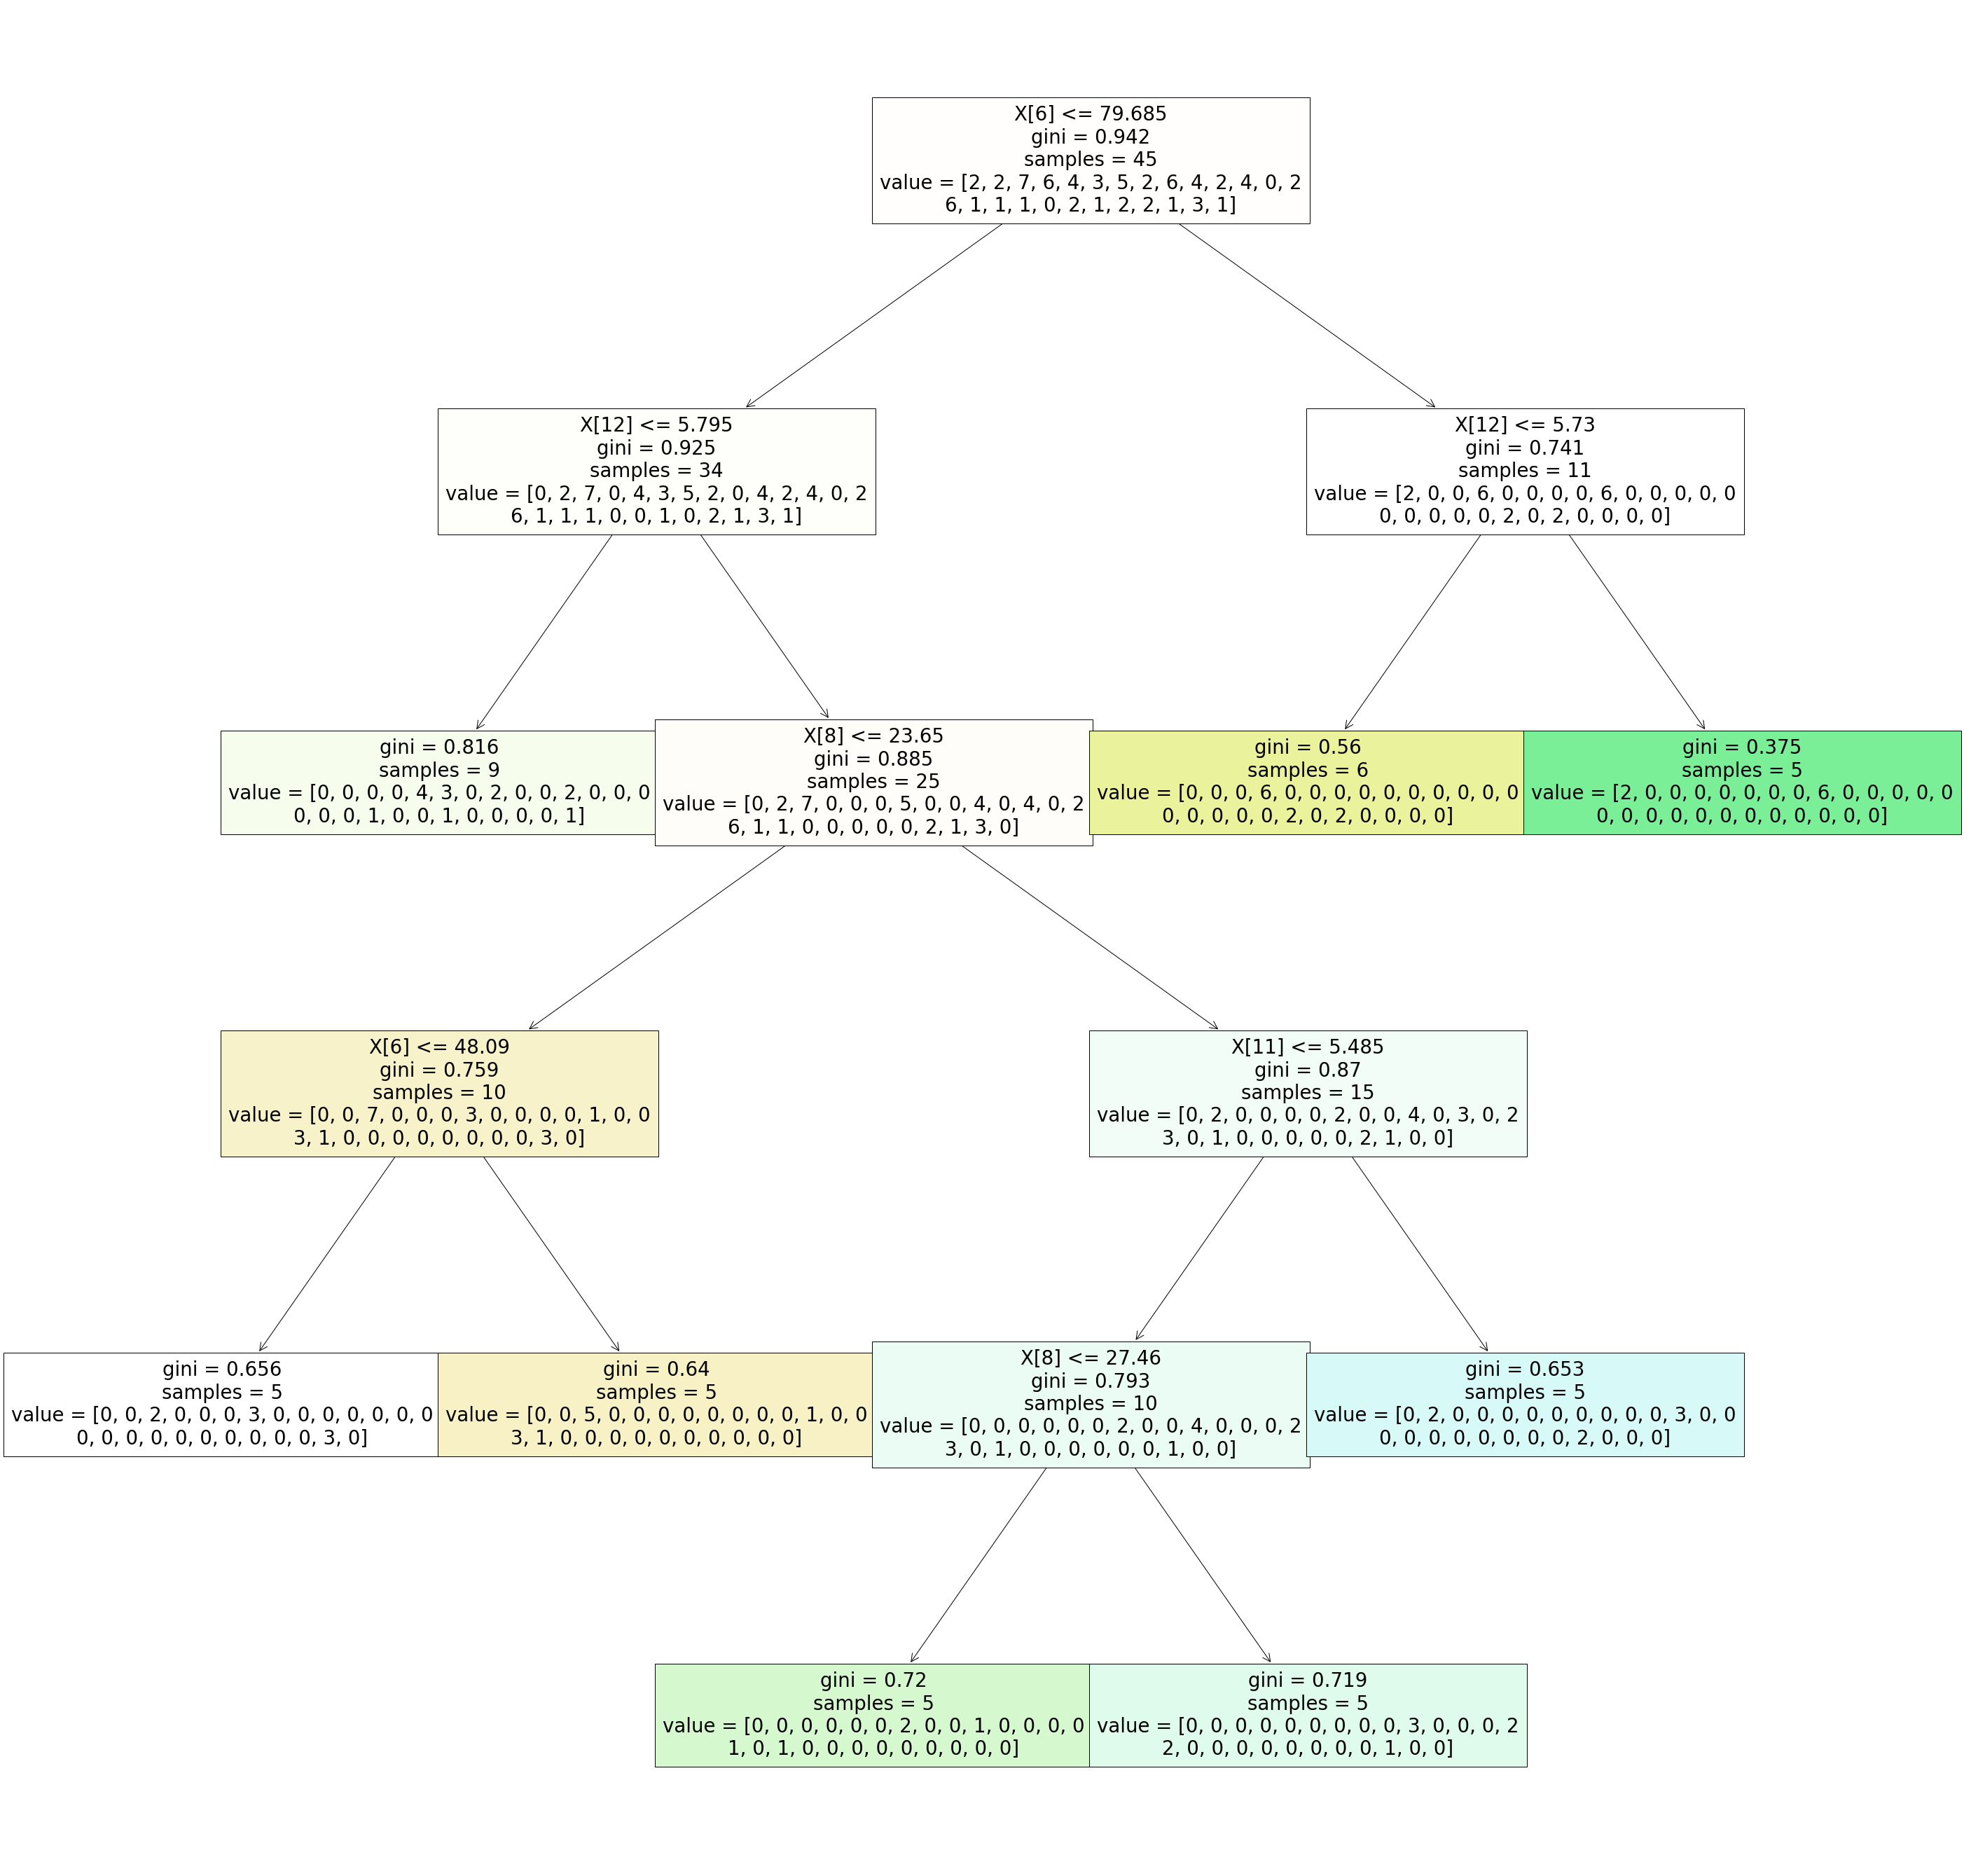

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:Random Forest score=0.37142857142857144 is a Highest accuracy

# DATA SET 6

In [44]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2006.csv")
s

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2006-02-01 01:00:00,NaN,1.84,NaN,NaN,NaN,155.100006,490.100006,NaN,4.880000,97.570000,40.259998,NaN,33.779999,NaN,NaN,28079001
1,2006-02-01 01:00:00,1.68,1.01,2.38,6.36,0.32,94.339996,229.699997,3.04,7.100000,25.820000,NaN,2.48,11.890000,1.59,12.340000,28079035
2,2006-02-01 01:00:00,NaN,1.25,NaN,NaN,NaN,66.800003,192.000000,NaN,4.430000,34.419998,NaN,NaN,19.719999,NaN,NaN,28079003
3,2006-02-01 01:00:00,NaN,1.68,NaN,NaN,NaN,103.000000,407.799988,NaN,4.830000,28.260000,NaN,NaN,21.129999,NaN,NaN,28079004
4,2006-02-01 01:00:00,NaN,1.31,NaN,NaN,NaN,105.400002,269.200012,NaN,6.990000,54.180000,NaN,NaN,11.050000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230563,2006-05-01 00:00:00,5.88,0.83,6.23,NaN,0.20,112.500000,218.000000,NaN,24.389999,93.120003,NaN,NaN,7.400000,1.50,28.129999,28079023
230564,2006-05-01 00:00:00,0.76,0.32,0.48,1.09,0.08,51.900002,54.820000,0.61,48.410000,29.469999,15.640000,0.50,8.840000,1.32,2.310000,28079024
230565,2006-05-01 00:00:00,0.96,NaN,0.69,NaN,0.19,135.100006,179.199997,NaN,11.460000,64.680000,35.000000,NaN,12.110000,1.51,4.520000,28079026
230566,2006-05-01 00:00:00,0.50,NaN,0.67,NaN,0.10,82.599998,105.599998,NaN,NaN,94.360001,NaN,NaN,4.890000,1.47,4.050000,28079027


In [45]:
s1=s.fillna(value=4)
s1

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2006-02-01 01:00:00,4.00,1.84,4.00,4.00,4.00,155.100006,490.100006,4.00,4.880000,97.570000,40.259998,4.00,33.779999,4.00,4.000000,28079001
1,2006-02-01 01:00:00,1.68,1.01,2.38,6.36,0.32,94.339996,229.699997,3.04,7.100000,25.820000,4.000000,2.48,11.890000,1.59,12.340000,28079035
2,2006-02-01 01:00:00,4.00,1.25,4.00,4.00,4.00,66.800003,192.000000,4.00,4.430000,34.419998,4.000000,4.00,19.719999,4.00,4.000000,28079003
3,2006-02-01 01:00:00,4.00,1.68,4.00,4.00,4.00,103.000000,407.799988,4.00,4.830000,28.260000,4.000000,4.00,21.129999,4.00,4.000000,28079004
4,2006-02-01 01:00:00,4.00,1.31,4.00,4.00,4.00,105.400002,269.200012,4.00,6.990000,54.180000,4.000000,4.00,11.050000,4.00,4.000000,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230563,2006-05-01 00:00:00,5.88,0.83,6.23,4.00,0.20,112.500000,218.000000,4.00,24.389999,93.120003,4.000000,4.00,7.400000,1.50,28.129999,28079023
230564,2006-05-01 00:00:00,0.76,0.32,0.48,1.09,0.08,51.900002,54.820000,0.61,48.410000,29.469999,15.640000,0.50,8.840000,1.32,2.310000,28079024
230565,2006-05-01 00:00:00,0.96,4.00,0.69,4.00,0.19,135.100006,179.199997,4.00,11.460000,64.680000,35.000000,4.00,12.110000,1.51,4.520000,28079026
230566,2006-05-01 00:00:00,0.50,4.00,0.67,4.00,0.10,82.599998,105.599998,4.00,4.000000,94.360001,4.000000,4.00,4.890000,1.47,4.050000,28079027


In [46]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230568 entries, 0 to 230567
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     230568 non-null  object 
 1   BEN      230568 non-null  float64
 2   CO       230568 non-null  float64
 3   EBE      230568 non-null  float64
 4   MXY      230568 non-null  float64
 5   NMHC     230568 non-null  float64
 6   NO_2     230568 non-null  float64
 7   NOx      230568 non-null  float64
 8   OXY      230568 non-null  float64
 9   O_3      230568 non-null  float64
 10  PM10     230568 non-null  float64
 11  PM25     230568 non-null  float64
 12  PXY      230568 non-null  float64
 13  SO_2     230568 non-null  float64
 14  TCH      230568 non-null  float64
 15  TOL      230568 non-null  float64
 16  station  230568 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 29.9+ MB


In [47]:
s2=s1.head(100)
s2

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2006-02-01 01:00:00,4.00,1.84,4.00,4.00,4.00,155.100006,490.100006,4.00,4.88,97.570000,40.259998,4.00,33.779999,4.00,4.00,28079001
1,2006-02-01 01:00:00,1.68,1.01,2.38,6.36,0.32,94.339996,229.699997,3.04,7.10,25.820000,4.000000,2.48,11.890000,1.59,12.34,28079035
2,2006-02-01 01:00:00,4.00,1.25,4.00,4.00,4.00,66.800003,192.000000,4.00,4.43,34.419998,4.000000,4.00,19.719999,4.00,4.00,28079003
3,2006-02-01 01:00:00,4.00,1.68,4.00,4.00,4.00,103.000000,407.799988,4.00,4.83,28.260000,4.000000,4.00,21.129999,4.00,4.00,28079004
4,2006-02-01 01:00:00,4.00,1.31,4.00,4.00,4.00,105.400002,269.200012,4.00,6.99,54.180000,4.000000,4.00,11.050000,4.00,4.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006-02-01 04:00:00,4.00,0.71,4.00,4.00,4.00,59.869999,144.199997,4.00,3.69,17.420000,4.000000,4.00,9.050000,4.00,4.00,28079019
96,2006-02-01 04:00:00,4.00,0.45,4.00,4.00,4.00,76.760002,98.300003,4.00,6.63,11.680000,4.000000,4.00,11.770000,4.00,4.00,28079036
97,2006-02-01 04:00:00,4.00,1.01,4.00,4.00,4.00,47.980000,144.100006,4.00,4.47,20.520000,4.000000,4.00,14.150000,4.00,4.00,28079021
98,2006-02-01 04:00:00,4.00,0.74,4.00,4.00,4.00,41.560001,105.800003,4.00,6.51,7.170000,15.900000,4.00,10.390000,4.00,4.00,28079022


In [84]:
#linear
x=s2.iloc[:,1:8]
y=s2.iloc[:,-1]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [86]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [87]:
print(lr.intercept_)

28079009.635259937


In [88]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,15.536692
CO,-1.743589
EBE,-24.141498
MXY,8.218317
NMHC,2.842403
NO_2,-0.044671
NOx,0.012356


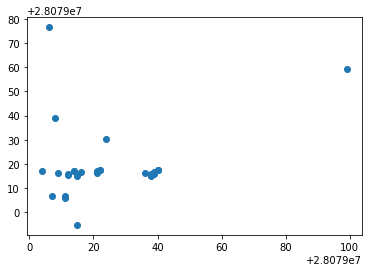

In [89]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [90]:
print(lr.score(x_test,y_test))

-0.2503467951715337


In [91]:
lr.score(x_train,y_train)

0.3022490730401385

In [92]:
#lasso
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [93]:
la.score(x_test,y_test)

-0.05226774555406388

In [94]:
#ridge
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [95]:
rr.score(x_test,y_test)

0.07762509727891187

In [96]:
#logistic
b=StandardScaler().fit_transform(x)


In [97]:
p=LogisticRegression(max_iter=10000)
p.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [98]:
t=[[12,22,32,42,52,45,32]]

In [99]:
e=p.predict(t)
print(e)

[28079018]


In [100]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079008,
       28079009, 28079011, 28079012, 28079014, 28079015, 28079016,
       28079018, 28079019, 28079021, 28079022, 28079023, 28079024,
       28079026, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079099], dtype=int64)

In [101]:
print(p.score(x_test,y_test))

0.6666666666666666


In [102]:
p.predict_proba(t)[0][0]

1.3697419171306892e-24

In [103]:
p.predict_proba(t)[0][1]

1.95924077268285e-16

In [104]:
#elastic
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [105]:
print(p.coef_)

[-0.76420052  0.         -3.00657212  2.21267232  0.43926185  0.
 -0.01067119]


In [106]:
print(p.intercept_)

28079023.39300968


In [107]:
print(p.predict(x_test))

[28079016.842109   28079028.3572873  28079022.98799125 28079016.57853059
 28079017.43649435 28079016.52197324 28079018.05424965 28079017.19105694
 28079015.9083797  28079016.79622284 28079015.57971086 28079016.62975234
 28079017.78864369 28079016.26479745 28079016.89546496 28079031.51340605
 28079016.38709535 28079015.86569494 28079023.64704062 28079025.71512176
 28079017.18145293 28079014.72417974 28079016.80049141 28079016.04497083
 28079016.32230374 28079020.04156122 28079016.39391894 28079016.4472749
 28079017.370333   28079017.41942054]


In [108]:
print(p.score(x_test,y_test))

0.007455168919861532


In [109]:
#randomforest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
parameters={'max_depth':[1,53,75,3,57],
  'min_samples_leaf':[5,34,6,87,45],
           'n_estimators':[3,53,7,23,56]}

In [111]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 75, 3, 57],
                         'min_samples_leaf': [5, 34, 6, 87, 45],
                         'n_estimators': [3, 53, 7, 23, 56]},
             scoring='accuracy')

In [112]:
grid_search.best_score_

0.2142857142857143

In [113]:
rfc_best=grid_search.best_estimator_

[Text(1860.0, 2330.685, 'X[3] <= 5.51\ngini = 0.939\nsamples = 41\nvalue = [2, 7, 0, 4, 2, 1, 0, 0, 2, 5, 2, 5, 5, 4\n2, 2, 5, 2, 2, 5, 3, 0, 0, 0, 4, 6]'),
 Text(1395.0, 1664.7749999999999, 'X[2] <= 3.32\ngini = 0.926\nsamples = 34\nvalue = [2, 7, 0, 0, 2, 1, 0, 0, 2, 5, 2, 5, 5, 4\n2, 2, 5, 2, 2, 5, 0, 0, 0, 0, 4, 0]'),
 Text(930.0, 998.865, 'X[1] <= 1.965\ngini = 0.782\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0\n0, 0, 5, 2, 2, 5, 0, 0, 0, 0, 0, 0]'),
 Text(465.0, 332.9549999999999, 'gini = 0.691\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0\n0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(1395.0, 332.9549999999999, 'gini = 0.531\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 1, 0, 2, 5, 0, 0, 0, 0, 0, 0]'),
 Text(1860.0, 998.865, 'gini = 0.89\nsamples = 23\nvalue = [2, 7, 0, 0, 2, 0, 0, 0, 2, 5, 0, 5, 5, 4\n2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]'),
 Text(2325.0, 1664.7749999999999, 'gini = 0.639\nsamples = 7\nvalue = [0, 0, 0

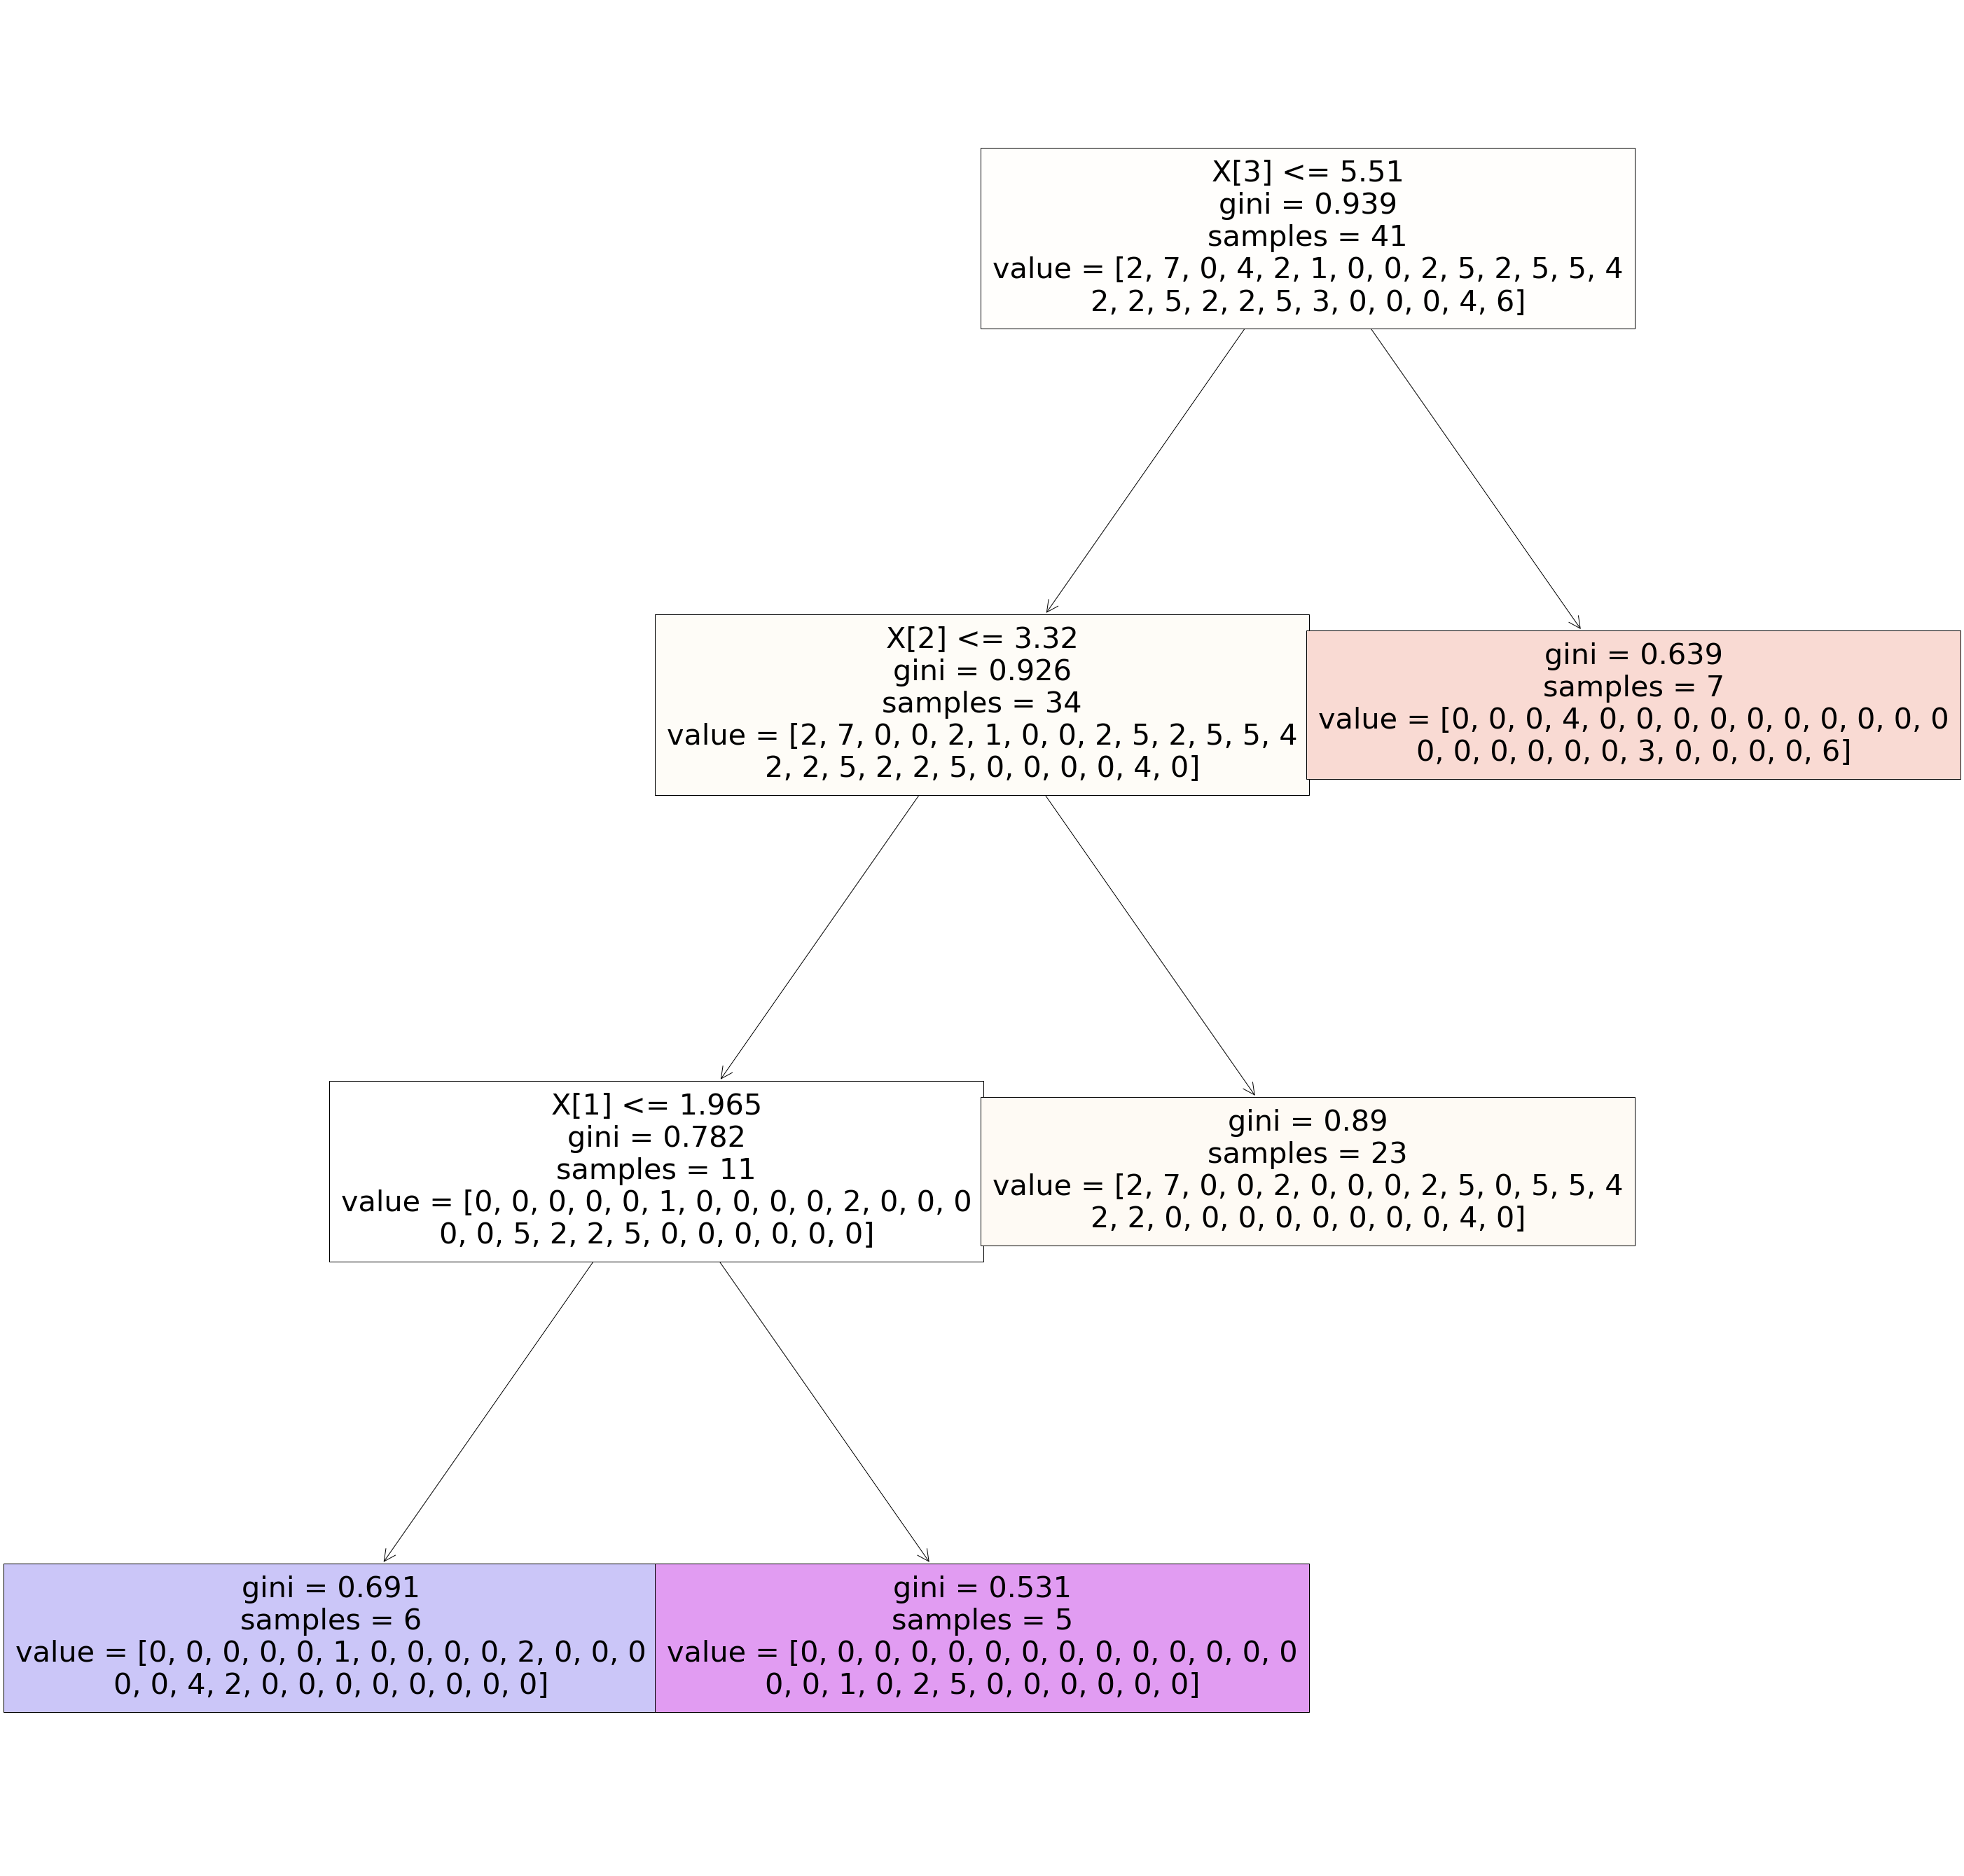

In [114]:
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:LOGISTIC SCORE=0.6666666666666666 is a Highest accuracy